# RL and Advanced DL: Домашнее задание 1

Первое ДЗ связано с обучением с подкреплением, и оно придумано для ситуации, когда нейронные сети ещё не нужны, и пространство состояний в целом достаточно маленькое, чтобы можно было обучить хорошую стратегию методами TD-обучения или другими методами обучения с подкреплением. Задание получилось, надеюсь, интересное, но в том числе и достаточно техническое, так что для решения придётся немножко попрограммировать. Поэтому в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Любые комментарии, новые идеи и рассуждения на тему, как всегда, категорически приветствуются.

##  Содержание <a name = 'outline'></a>

* [Часть I: с блекджеком и стратегиями](#part_1)
    * [Задание 1](#task_1)
    * [Задание 2](#task_2)
    * [Задание 3](#task_3)

* [Часть II: удвоенная](#port_2)
    * [Задание 4](#task_4)
    * [Задание 5](#task_5)

* [Часть III: в главной роли — Дастин Хоффман](#port_3)
    * [Задание 6](#task_6)
    * [Задание 7](#task_7)


In [1]:
import matplotlib.pyplot as plt
from blackjack import *

In [2]:
def plot(array_1, array_2, name_1, name_2, title):
    plt.subplots(figsize=(20, 8))
    plt.plot(array_1[100:], label=name_1)
    plt.plot(array_2[100:], label=name_2)
    plt.title(title)
    plt.legend()
    plt.show()

### Часть I: с блекджеком и стратегиями <a name = "part_1"/>

Мы будем обучаться играть в очень простую, но знаменитую и популярную игру: блекджек.

Правила блекджека достаточно просты; давайте начнём с самой базовой версии, которая реализована в OpenAI Gym:
* численные значения карт равны от 2 до 10 для карт от двойки до десятки, 10 для валетов, дам и королей;
* туз считается за 11 очков, если общая сумма карт на руке при этом не превосходит 21 (по-английски в этом случае говорят, что на руке есть usable ace), и за 1 очко, если превосходит;
* игроку раздаются две карты, дилеру — одна в открытую и одна в закрытую;
* игрок может совершать одно из двух действий:
    * hit  — взять ещё одну карту;
    * stand — не брать больше карт;
* если сумма очков у игрока на руках больше 21, он проигрывает (bust);
* если игрок выбирает stand с суммой не больше 21, дилер добирает карты, пока сумма карт в его руке меньше 17;
* после этого игрок выигрывает, если дилер либо превышает 21, либо получает сумму очков меньше, чем сумма очков у игрока; при равенстве очков объявляется ничья (ставка возвращается);
* в исходных правилах есть ещё дополнительный бонус за natural blackjack: если игрок набирает 21 очко с раздачи, двумя картами, он выигрывает не +1, а +1.5 (полторы ставки).

Именно этот простейший вариант блекджека реализован в [OpenAI Gym](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py):

Рассмотрим очень простую стратегию: говорить stand, если у нас на руках комбинация в 19, 20 или 21 очко, во всех остальных случаях говорить hit. Используйте методы Монте-Карло, чтобы оценить выигрыш от этой стратегии.

В файле [strategy.py](blackjack/strategy.py) определен интерфейс BaseStrategy и реализована стратегии RandomStrategy, которая выбирает случайное действие, и ConstantStrategy, которая реализует стратегию, описанную выше

В файле [environment.py](blackjack/environment.py) реализован простейший вариант блекджека BaseBlackJackEnvironment, практически полностью скопированный с [OpenAI Gym](https://github.com/openai/gym/blob/master/gym/envs/toy_text/blackjack.py)

В файле [simulation.py](blackjack/simulation.py) рализоавана логика симуляции игры BaseBlackJackEnvironment со стратегией BaseStrategy.

Используя подготовленные реализации можно провести эксперименты

In [3]:
env_1 = SimpleBlackJackEnv()

In [4]:
random_strategy = RandomStrategy(env_1.action_space.n)
random_black_jack = BlackJackSimulation(env_1, 200000, random_strategy)
random_mean_rewards, random_win_rates = random_black_jack.experiment()
print(f"Средний выигрыш от стратегии со случайными действими: {random_mean_rewards[-1]}, доля выигрышных эпизодов: {random_win_rates[-1]}")

Средний выигрыш от стратегии со случайными действими: -0.39751, доля выигрышных эпизодов: 0.279755


In [5]:
constant_strategy = ConstantStrategy()
constant_black_jack = BlackJackSimulation(env_1, 200000, constant_strategy)
constant_mean_rewards, constant_win_rates = constant_black_jack.experiment()
print(f"Средний выигрыш от \"Простой стратегии\": {constant_mean_rewards[-1]}, доля выигрышных эпизодов: {constant_win_rates[-1]}")

Средний выигрыш от "Простой стратегии": -0.201045, доля выигрышных эпизодов: 0.36106


#### Задание 2  <a name = "task_2"/>

Реализуйте метод обучения с подкреплением без модели (можно Q-обучение, но рекомендую попробовать и другие, например Monte Carlo control) для обучения стратегии в блекджеке, используя окружение Blackjack-v0 из OpenAI Gym.


В файле [strategy.py](blackjack/strategy.py) реализована стратегия MonteCarloControl

Обучим стратегию используя эпсилон = 1, и гамма 0.7

In [6]:
mcc = MonteCarloControl(1, 0.8, env_1.action_space.n)
mcc_black_jack = BlackJackSimulation(env_1, 200000, mcc)
mcc_mean_rewards, mcc_win_rates = mcc_black_jack.experiment()
print(f"Средний выигрыш от Monte Carlo Control: {mcc_mean_rewards[-1]}, доля выигрышных эпизодов: {mcc_win_rates[-1]}")

Средний выигрыш от Monte Carlo Control: -0.103535, доля выигрышных эпизодов: 0.41006


#### Задание 3  <a name = "task_3"/>

Сколько выигрывает казино у вашей стратегии? Нарисуйте графики среднего дохода вашего метода (усреднённого по крайней мере по 100000 раздач, а лучше больше) по ходу обучения. Попробуйте подобрать оптимальные гиперпараметры.

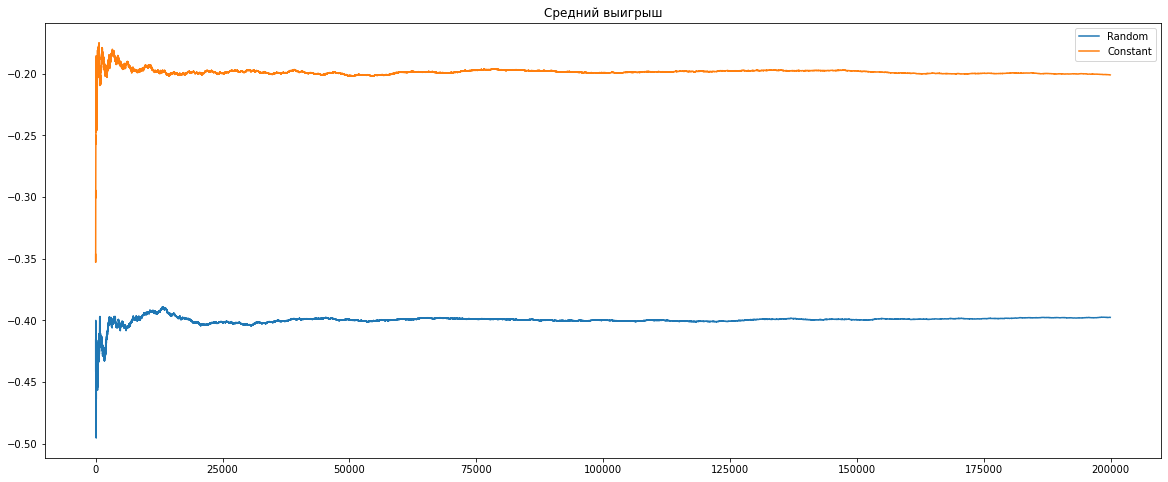

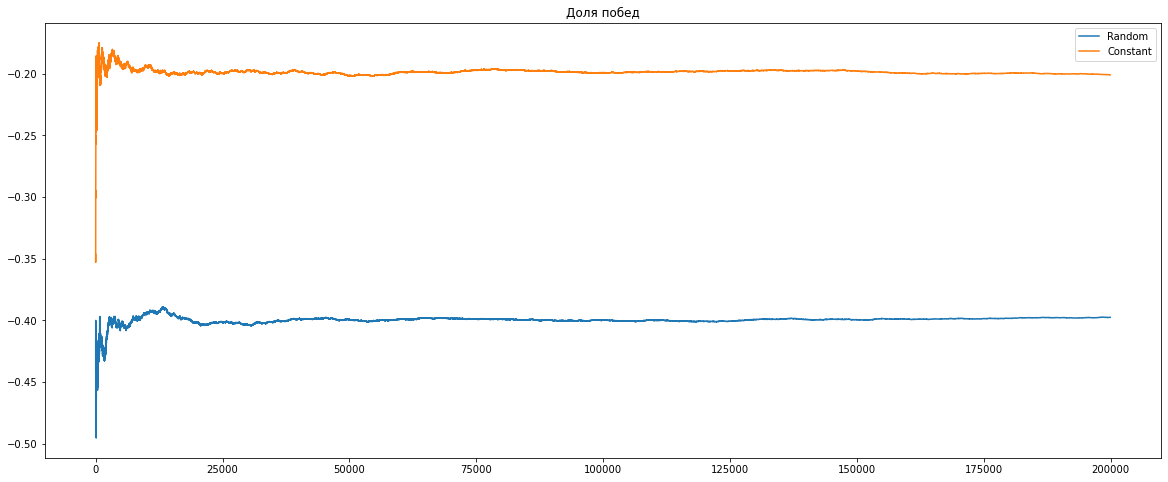

In [7]:
plot(random_mean_rewards, constant_mean_rewards, "Random", "Constant", "Средний выигрыш")
plot(random_mean_rewards, constant_mean_rewards, "Random", "Constant", "Доля побед")

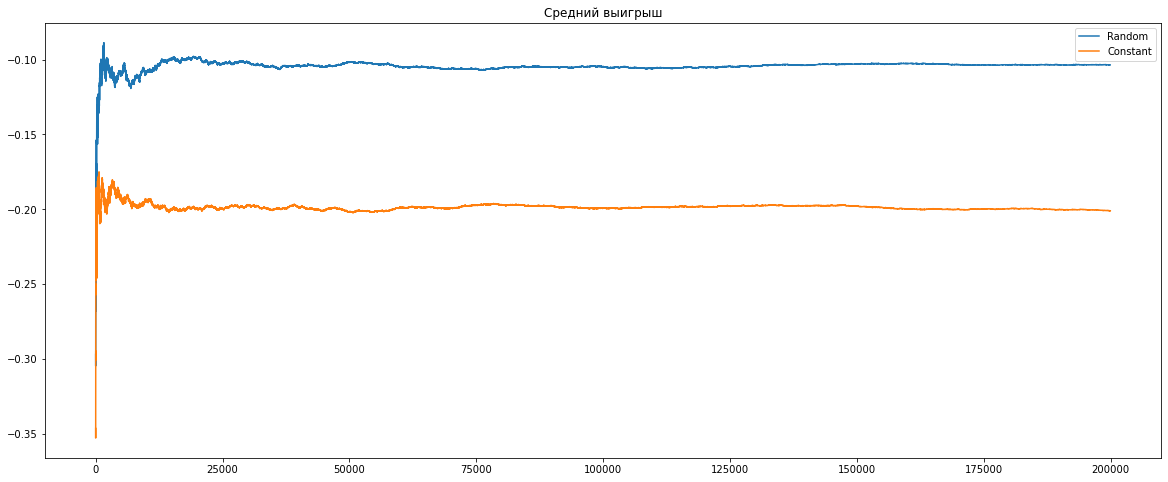

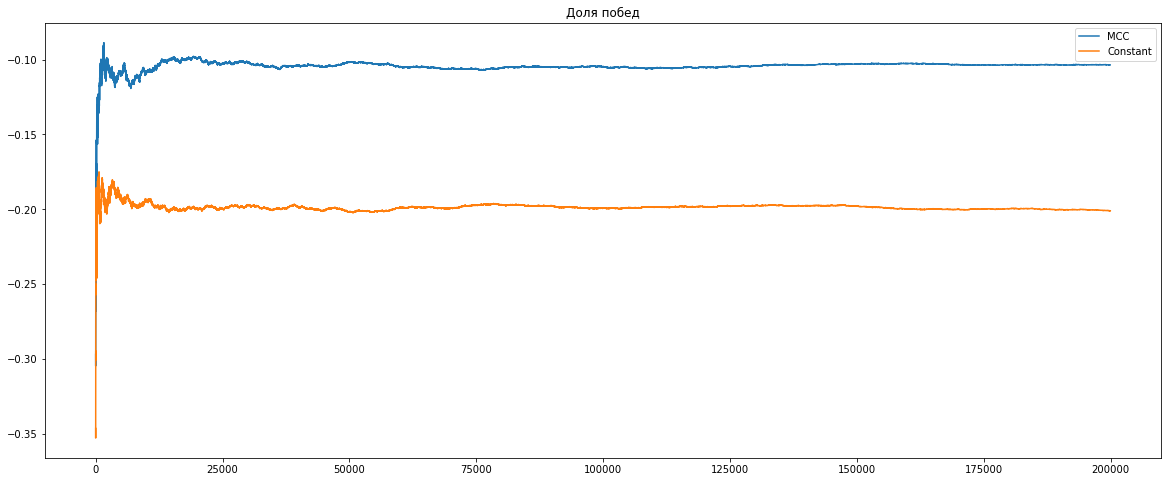

In [8]:
plot(mcc_mean_rewards, constant_mean_rewards, "Random", "Constant", "Средний выигрыш")
plot(mcc_mean_rewards, constant_mean_rewards, "MCC", "Constant", "Доля побед")

Выиграть у казино пока не удалось

### Часть II: удвоенная <a name = "part_2"/>

В базовый блекджек, описанный в предыдущем разделе, обыграть казино вряд ли получится. Но, к счастью, на этом история не заканчивается. Описанные выше правила были упрощёнными, а на самом деле у игрока есть ещё и другие возможности. Реализовывать split может оказаться непросто, поэтому давайте ограничимся удвоением ставки. Итак, у игрока появляется дополнительное действие:
* double — удвоить ставку; при этом больше действий делать нельзя, игроку выдаётся ровно одна дополнительная карта, а выигрыш или проигрыш удваивается.


#### Задание 4  <a name = "task_4"/>

Реализуйте новый вариант блекджека на основе окружения Blackjack-v0 из OpenAI Gym, в котором разрешено удвоение ставки.

Новый вариант блекджека с удвоением находится в файле [environment.py](blackjack/environment.py) - DoubleBlackJackEnv

In [19]:
env_2 = DoubleBlackJackEnv()

#### Задание 5  <a name = "task_5"/>

Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики, аналогичные п.2.

In [20]:
mcc = MonteCarloControl(1, 0.8, env_2.action_space.n)
double_black_jack = BlackJackSimulation(env_2, 200000, mcc)
double_mean_rewards, double_win_rates = double_black_jack.experiment()
print(f"Средний выигрыш от Monte Carlo Control в блэкджек с удвоением: {double_mean_rewards[-1]}, доля выигрышных эпизодов: {double_win_rates[-1]}")

Средний выигрыш от Monte Carlo Control в блэкджек с удвоением: -0.09491, доля выигрышных эпизодов: 0.41317


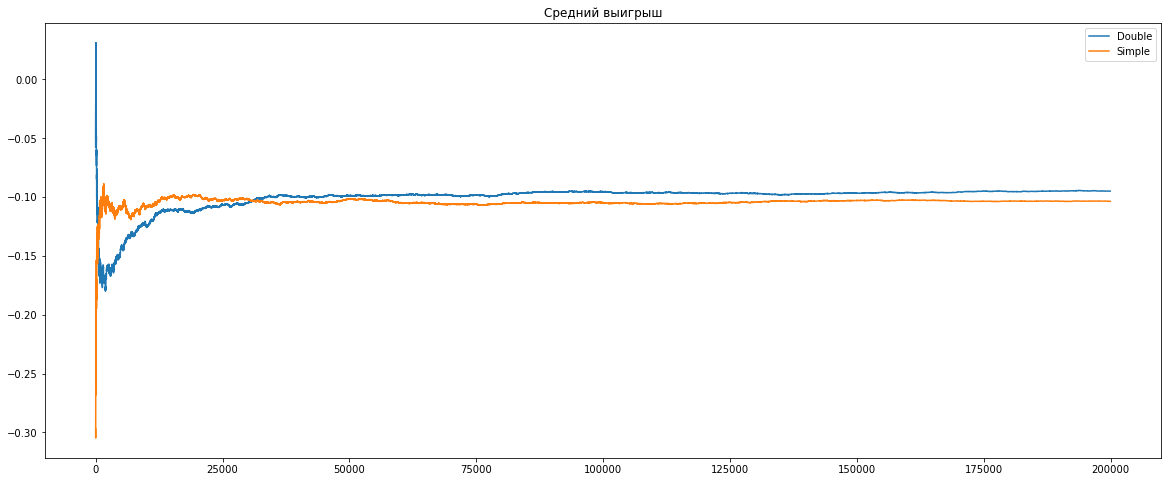

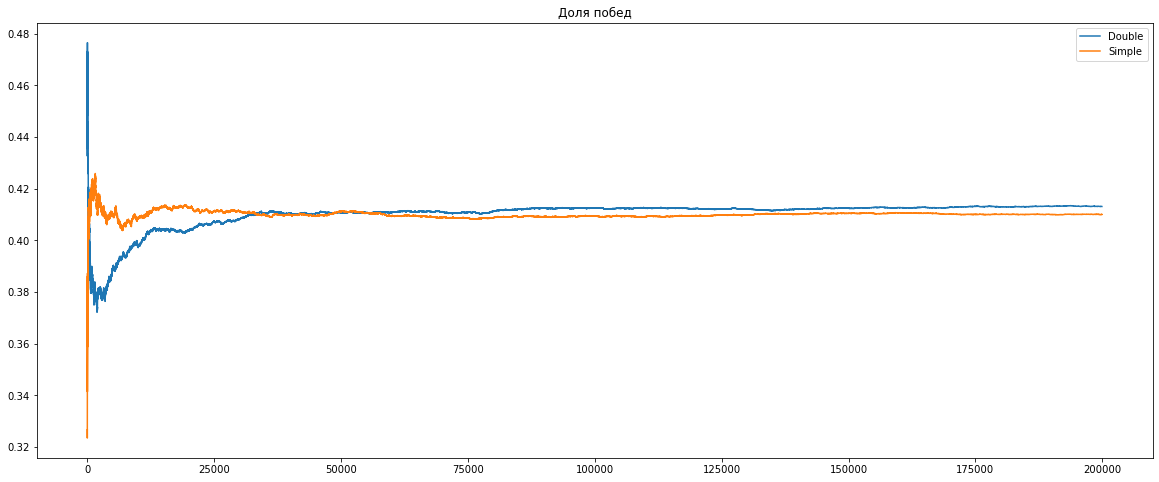

In [21]:
plot(double_mean_rewards, mcc_mean_rewards, "Double", "Simple", "Средний выигрыш")
plot(double_win_rates, mcc_win_rates, "Double", "Simple", "Доля побед")

### Часть III: в главной роли — Дастин Хоффман <a name = "part_3"/>

А теперь давайте вспомним, как играют в блекджек настоящие профессионалы. Дело в том, что в оффлайн-казино обычно не перемешивают колоду после каждой раздачи — это слишком замедляло бы игру. После раздачи карты просто раздаются дальше с верха колоды до тех пор, пока карт не останется слишком мало, и только тогда колода перемешивается; давайте для определённости считать, что наше казино будет перемешивать колоду, в которой осталось меньше 15 карт.

Действительно, если вы будете запоминать, какие карты уже вышли, у вас будет информация о том, какие карты ещё остались, а это позволяет лучше понять, когда нужно удваивать ставку или делать split, а когда лучше не стоит. В настоящем казино могут раздавать карты сразу из нескольких колод, и заслуга Rain Man’а была в том, что он смог считать карты в шести колодах одновременно. Но мы с вами вооружены компьютерами, так что подсчёт можно считать автоматическим.


#### Задание 6  <a name = "task_6"/>

Реализуйте вариант окружения Blackjack-v0 из предыдущей части (с удвоением), в котором игрок имеет возможность “считать карты” в колоде. Это можно сделать разными способами; возможно, вам поможет статья википедии о блекджеке (а возможно, и нет).


Новый вариант блекджека с удвоением находится в файле environment.py - DoubleCountBlackJackEnv

In [37]:
env_3 = DoubleCountBlackJackEnv()

#### Задание 7  <a name = "task_7"/>

Реализуйте метод обучения с подкреплением без модели для этого варианта, постройте графики, аналогичные п.2.


In [38]:
mcc = MonteCarloControl(1, 0.9, env_3.action_space.n)
count_black_jack = BlackJackSimulation(env_3, 200000, mcc)
count_mean_rewards, count_win_rates = count_black_jack.experiment()
print(f"Средний выигрыш от Monte Carlo Control c игрой с подсчетами {count_mean_rewards[-1]}, доля выигрышных эпизодов: {count_win_rates[-1]}")

Средний выигрыш от Monte Carlo Control c игрой с подсчетами -0.120485, доля выигрышных эпизодов: 0.402525


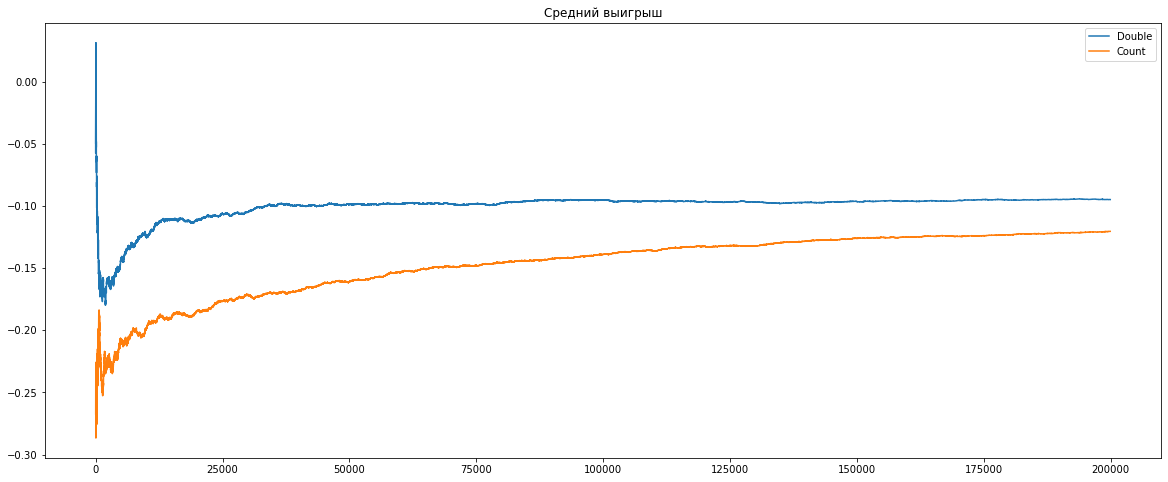

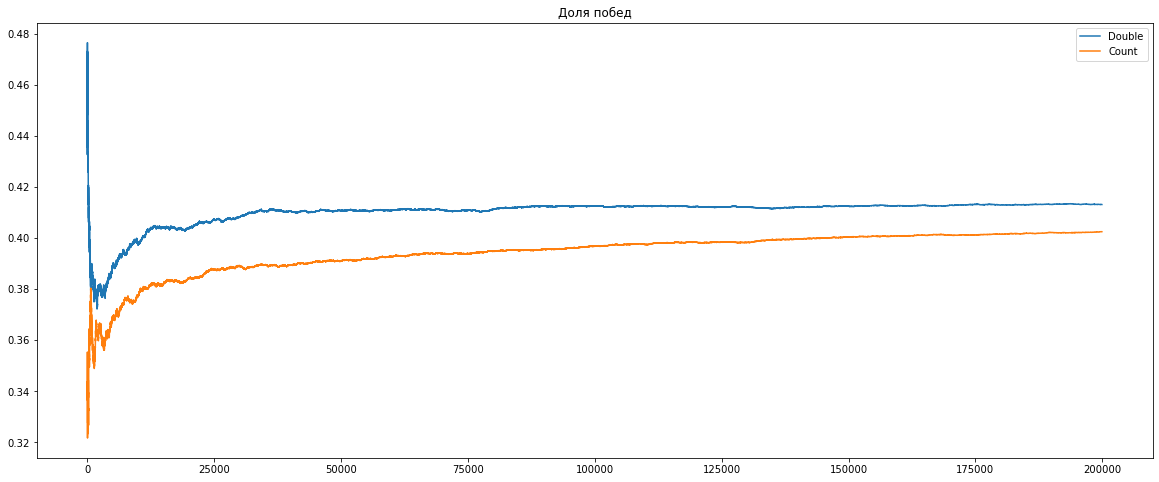

In [39]:
plot(double_mean_rewards, count_mean_rewards, "Double", "Count", "Средний выигрыш")
plot(double_win_rates, count_win_rates, "Double", "Count", "Доля побед")